In [9]:
import os
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [40]:
df = pd.read_csv(os.path.join('heart_failure', 'train_val_split.csv'))
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
2,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
3,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
4,39,M,NAP,120,339,0,Normal,170,N,0.0,Up,0


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,734.0,53.523161,9.421110,29.0,47.00,54.0,60.0,77.0
RestingBP,734.0,132.062670,18.618490,0.0,120.00,130.0,140.0,200.0
Cholesterol,734.0,197.588556,108.979439,0.0,172.25,222.0,267.0,529.0
FastingBS,734.0,0.232970,0.423012,0.0,0.00,0.0,0.0,1.0
MaxHR,734.0,136.167575,25.334552,60.0,120.00,138.0,155.0,195.0
Oldpeak,734.0,0.873978,1.082222,-2.0,0.00,0.5,1.5,6.2
HeartDisease,734.0,0.542234,0.498553,0.0,0.00,1.0,1.0,1.0


In [7]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

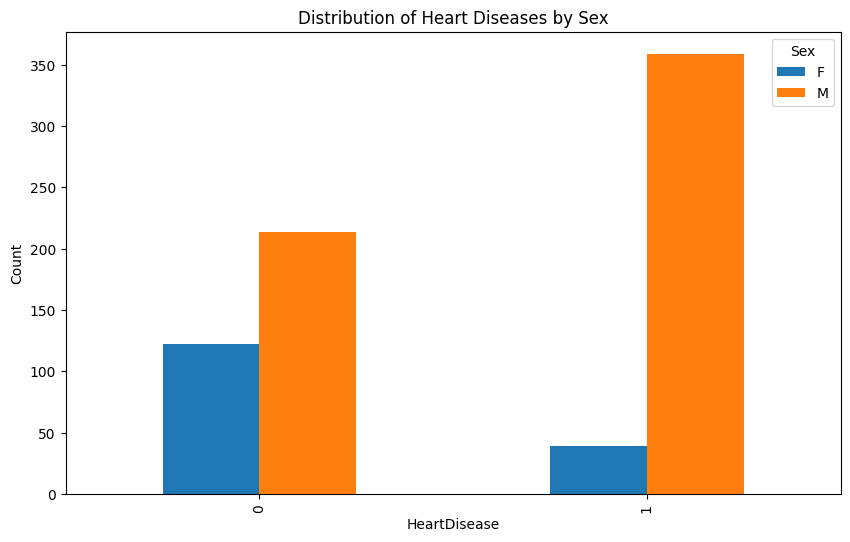

In [14]:
plt.figure(figsize=(10, 6))
df.groupby(['HeartDisease', 'Sex']).size().unstack().plot(kind='bar', stacked=False, ax=plt.gca())
plt.title("Distribution of Heart Diseases by Sex")
plt.xlabel("HeartDisease")
plt.ylabel("Count")
plt.legend(title="Sex")
plt.show()

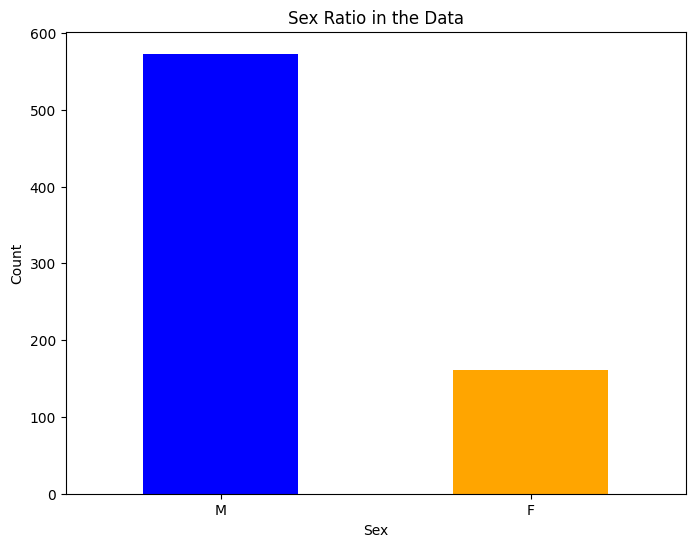

In [16]:
plt.figure(figsize=(8, 6))
df['Sex'].value_counts().plot(kind='bar', color=['blue', 'orange'])
plt.title("Sex Ratio in the Data")
plt.xlabel("Sex")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.show()

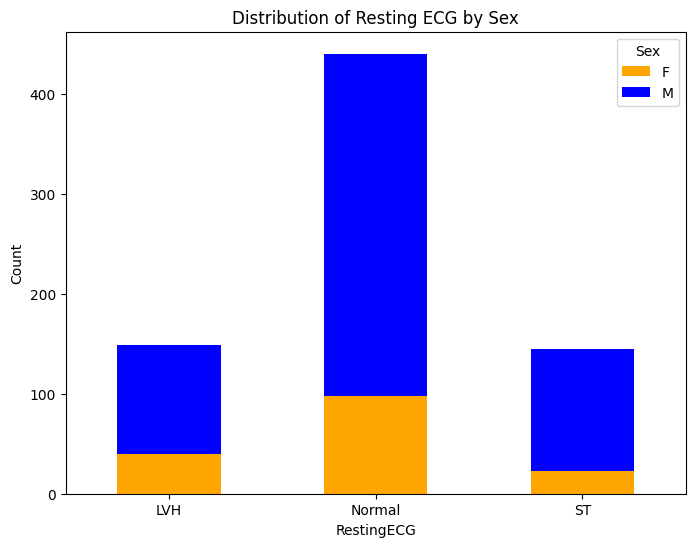

In [22]:
plt.figure(figsize=(8, 6))
df.groupby(['RestingECG', 'Sex']).size().unstack().plot(kind='bar', stacked=True, color=['orange', 'blue'], ax=plt.gca())
plt.title("Distribution of Resting ECG by Sex")
plt.xlabel("RestingECG")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.legend(title="Sex")
plt.show()

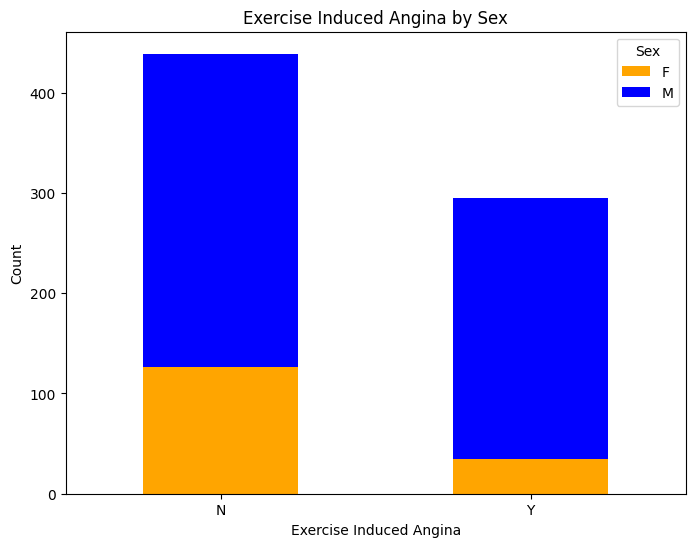

In [24]:
plt.figure(figsize=(8, 6))
df.groupby(['ExerciseAngina', 'Sex']).size().unstack().plot(kind='bar', stacked=True, color=['orange', 'blue'], ax=plt.gca())
plt.title("Exercise Induced Angina by Sex")
plt.xlabel("Exercise Induced Angina")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.legend(title="Sex")
plt.show()

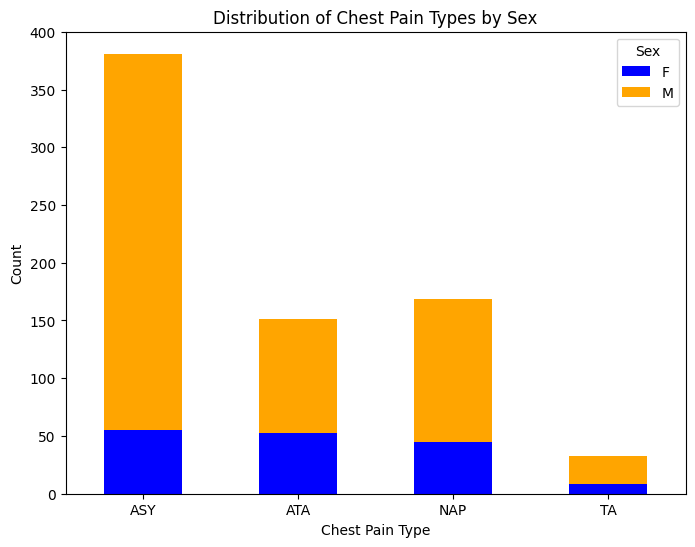

In [27]:
plt.figure(figsize=(8, 6))
df.groupby(['ChestPainType', 'Sex']).size().unstack().plot(kind='bar', stacked=True, color=['blue', 'orange'], ax=plt.gca())
plt.title("Distribution of Chest Pain Types by Sex")
plt.xlabel("Chest Pain Type")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.legend(title="Sex")
plt.show()

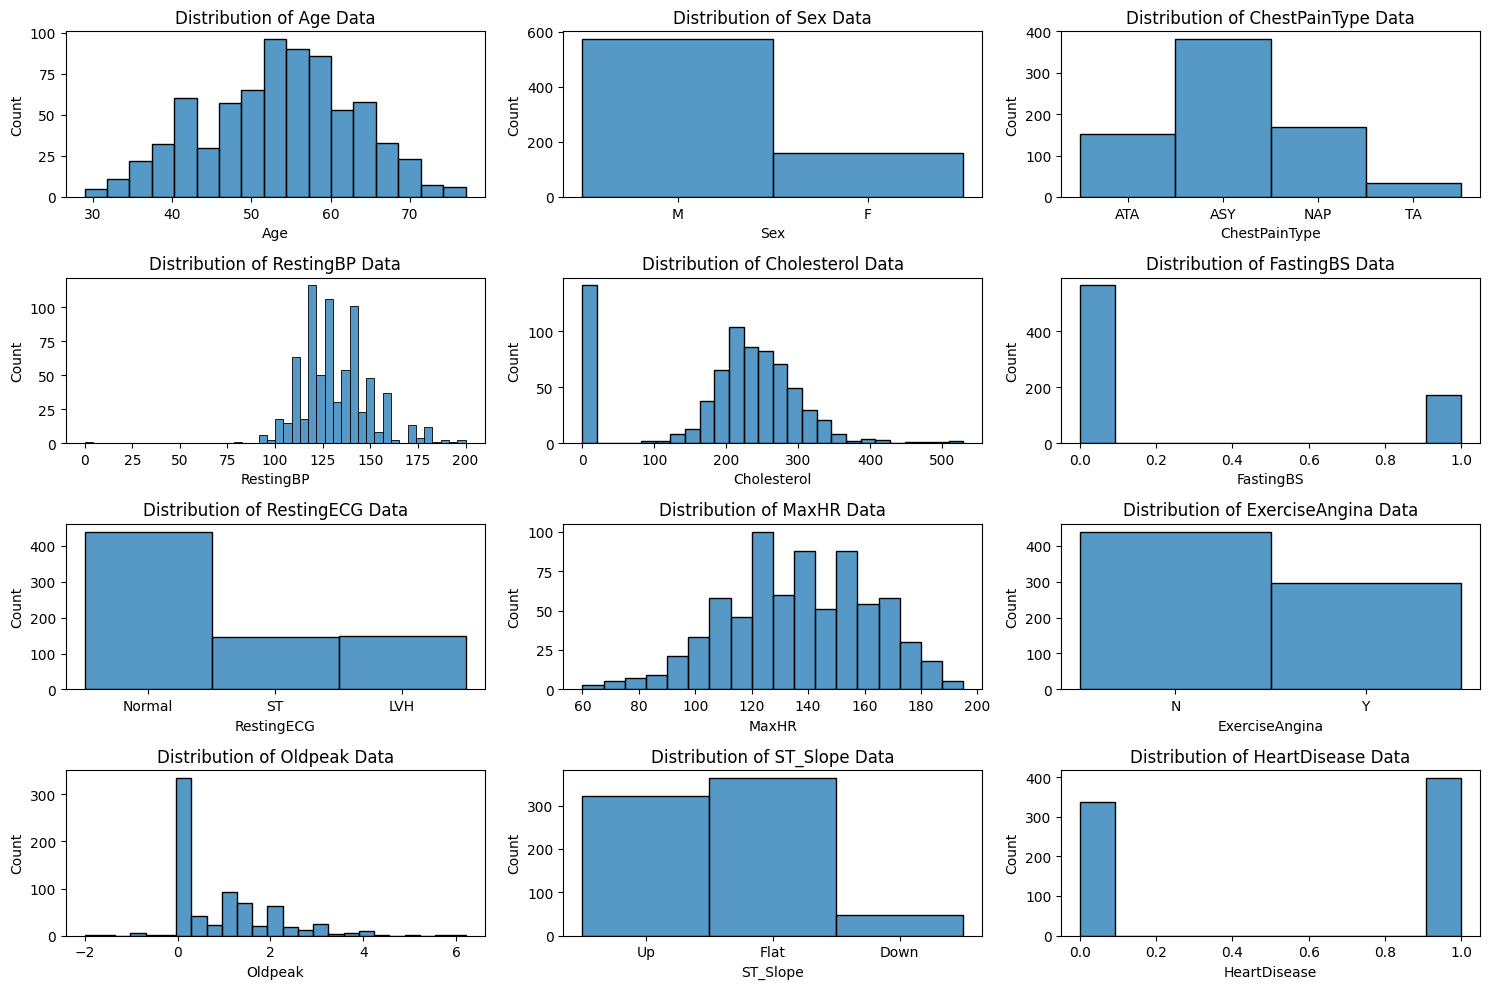

In [20]:
plt.figure(figsize=(15,10))
for i,col in enumerate(df.columns,1):
    plt.subplot(4,3,i)
    plt.title(f"Distribution of {col} Data")
    sns.histplot(df[col],kde=False)
    plt.tight_layout()
    plt.plot()

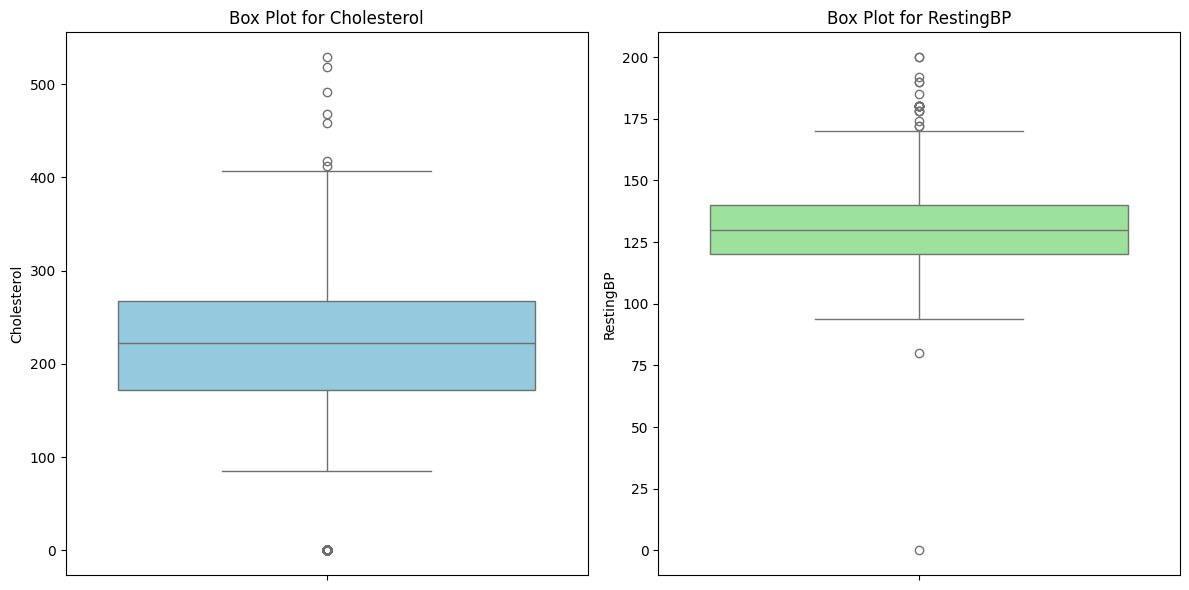

In [28]:
plt.figure(figsize=(12, 6))

# Box plot for Cholesterol
plt.subplot(1, 2, 1)
sns.boxplot(data=df, y='Cholesterol', color='skyblue')
plt.title('Box Plot for Cholesterol')
plt.ylabel('Cholesterol')

# Box plot for RestingBP
plt.subplot(1, 2, 2)
sns.boxplot(data=df, y='RestingBP', color='lightgreen')
plt.title('Box Plot for RestingBP')
plt.ylabel('RestingBP')

plt.tight_layout()
plt.show()

In [36]:
# Number of patients with cholesterol less than 50 --> Outlier
print(df[df['Cholesterol'] < 50].shape[0])

# Number of patients with cholesterol greater than 400 --> Outlier?
print(df[df['Cholesterol'] > 400].shape[0])

# Number of patients with resting blood pressure less than 50 --> Outlier
print(df[df['RestingBP'] < 50].shape[0])


141
9
1


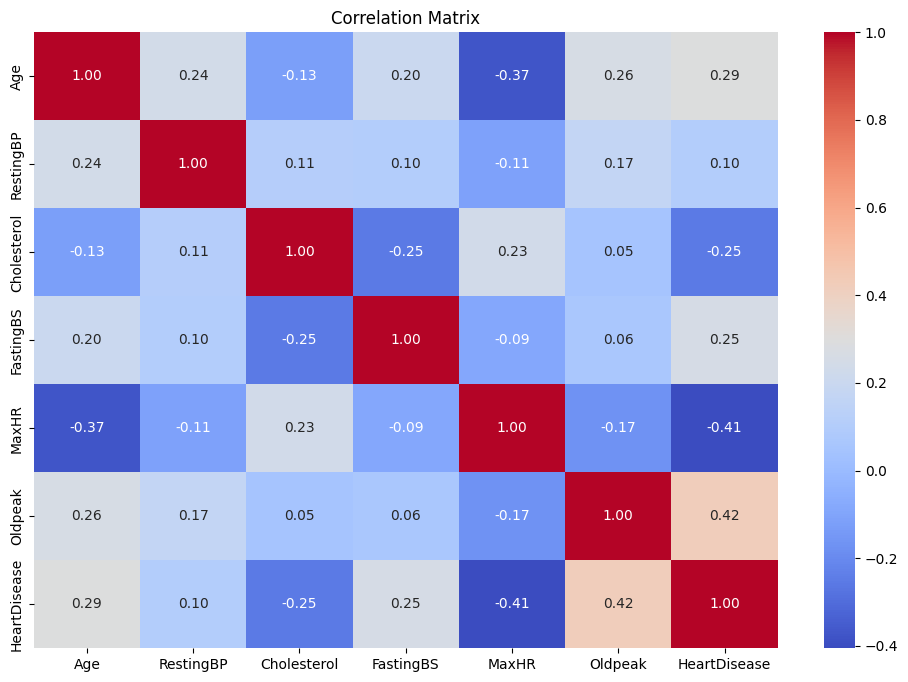

In [30]:
plt.figure(figsize=(12, 8))
numeric_df = df.select_dtypes(include=['number'])  # Select only numeric columns
correlation_matrix = numeric_df.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Matrix")
plt.show()

In [41]:
# Handle categorical variables

# Male is 1 and female is 0
df['Sex'] = df['Sex'].map({'M': 1, 'F': 0})

# ExerciseAngina: Yes is 1 and No is 0
df['ExerciseAngina'] = df['ExerciseAngina'].map({'Y': 1, 'N': 0})

# ST-Slope: Up is 1, Flat is 0, Down is -1
df['ST_Slope'] = df['ST_Slope'].map({'Up': 1, 'Flat': 0, 'Down': -1})

# One hot encoding for ChestPainType, RestingECG, 
df_encoded = pd.get_dummies(df, columns=['ChestPainType', 'RestingECG'], dtype=int)
df_encoded

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST
0,40,1,140,289,0,172,0,0.0,1,0,0,1,0,0,0,1,0
1,37,1,130,283,0,98,0,0.0,1,0,0,1,0,0,0,0,1
2,48,0,138,214,0,108,1,1.5,0,1,1,0,0,0,0,1,0
3,54,1,150,195,0,122,0,0.0,1,0,0,0,1,0,0,1,0
4,39,1,120,339,0,170,0,0.0,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
729,41,1,120,157,0,182,0,0.0,1,0,0,1,0,0,0,1,0
730,57,0,140,241,0,123,1,0.2,0,1,1,0,0,0,0,1,0
731,45,1,110,264,0,132,0,1.2,0,1,0,0,0,1,0,1,0
732,68,1,144,193,1,141,0,3.4,0,1,1,0,0,0,0,1,0
